In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

#construct "table de cas"
histories = pd.read_csv("yearHistoryTemplate.csv")
weather = pd.read_csv("weather2017.csv")
histories['DATE'] = pd.to_datetime(histories['dep_time'], format = '%Y-%m-%d').dt.date
weather['DATE'] = pd.to_datetime(weather['DATE'], format = '%Y-%m-%d').dt.date
histories['precipitation'] = histories['DATE'].map(weather.set_index('DATE')['PRECIP_TOTAL_DAY_MM'])
histories['visibility'] = histories['DATE'].map(weather.set_index('DATE')['VISIBILITY_AVG_KM'])

In [2]:
histories['month'] = pd.to_datetime(histories['dep_time'], format = '%Y-%m-%d').dt.month
histories['hour'] = pd.to_datetime(histories['dep_time'], format = '%Y-%m-%d').dt.hour
histories.head(10)


,id,client_id,departure_id,arrival_id,vehicle_id,dep_time,arr_time,late_time,base_price,sup_price,DATE,precipitation,visibility,month,hour
0,1,138,84,153,543,2017-01-01 00:36:00,2017-01-01 00:39:00,0,2.17,0.0,2017-01-01,0.0,10.0,1,0
1,2,1024,94,74,972,2017-01-01 00:11:00,2017-01-01 00:18:00,0,4.96,0.0,2017-01-01,0.0,10.0,1,0
2,3,2434,53,27,1756,2017-01-01 00:37:00,2017-01-01 01:05:00,0,11.99,0.0,2017-01-01,0.0,10.0,1,0
3,4,1344,81,17,1859,2017-01-01 00:28:00,2017-01-01 01:13:00,0,25.04,0.0,2017-01-01,0.0,10.0,1,0
4,5,1514,3,25,988,2017-01-01 01:34:00,2017-01-01 02:04:00,0,25.51,0.0,2017-01-01,0.0,10.0,1,1
5,6,791,122,47,1641,2017-01-01 01:03:00,2017-01-01 01:16:00,0,9.67,0.0,2017-01-01,0.0,10.0,1,1
6,7,1845,17,40,501,2017-01-01 01:04:00,2017-01-01 02:02:00,0,45.87,0.0,2017-01-01,0.0,10.0,1,1
7,8,1626,38,128,1233,2017-01-01 01:28:00,2017-01-01 01:48:00,0,17.86,0.0,2017-01-01,0.0,10.0,1,1
8,9,1577,149,162,1685,2017-01-01 01:13:00,2017-01-01 01:28:00,0,12.12,0.0,2017-01-01,0.0,10.0,1,1
9,10,2096,41,166,1579,2017-01-01 01:59:00,2017-01-01 02:17:00,0,16.34,0.0,2017-01-01,0.0,10.0,1,1


0.15278645020293474
late_time     9.135000
use_time     59.789333
prop          0.152648
dtype: float64


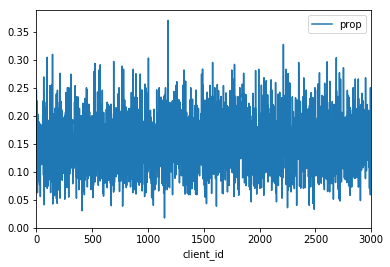

In [3]:
# Calcul du taux de retard par un an
retard = histories.loc[histories['late_time'] != 0]
print(float(retard.shape[0]/histories.shape[0]))

# Taux de retard par un client
agg = retard.groupby(['client_id']).size().to_frame(name='late_time')
agg2 = histories.groupby(['client_id']).size().to_frame(name='counts')
agg['use_time'] = agg2['counts']
agg['prop'] = agg['late_time']/agg['use_time']

# Calculate mean
print(agg.mean(axis=0))
#plt.scatter(agg['client_id'], agg['prop'])
agg.drop(['use_time','late_time'], axis=1).plot(kind='line')
plt.show()

In [5]:
agg = retard.groupby(['DATE']).size().to_frame(name='retard_times')
agg.reset_index(inplace=True)
agg['visibility'] = weather.groupby('DATE')['VISIBILITY_AVG_KM'].transform(lambda x: x)
agg['precipitation'] = weather.groupby('DATE')['PRECIP_TOTAL_DAY_MM'].transform(lambda x: x)
#agg.head(10)
# Calcule les correlations entre 'retard times', 'visibility' et 'precipitation'
agg.corr()

,retard_times,visibility,precipitation
retard_times,1.000000,-0.219435,0.620912
visibility,-0.219435,1.000000,-0.165959
precipitation,0.620912,-0.165959,1.000000


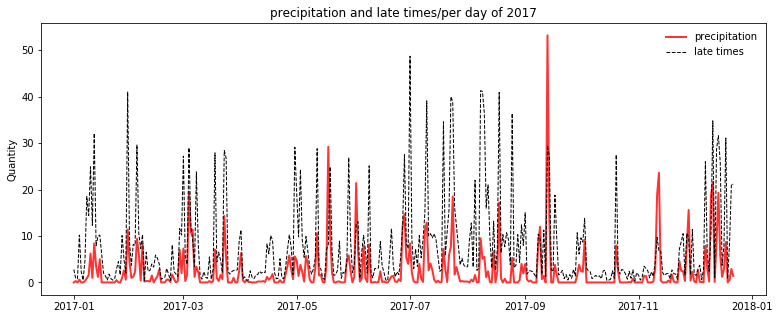

In [31]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(agg['DATE'], agg['precipitation'], linestyle='solid', c='red', lw=2,
        alpha=0.8, label='precipitation')
#ax.plot(agg['DATE'], agg['visibility'], linestyle='solid', c='black', lw=2,
#        label='visibility')
ax.plot(agg['DATE'], agg['retard_times']/10, linestyle='dashed', c='black', lw=1, 
        label='late times')
ax.legend(loc='best', frameon=False)
ax.set_title('precipitation and late times/per day of 2017')
ax.set_ylabel('Quantity')
plt.show()

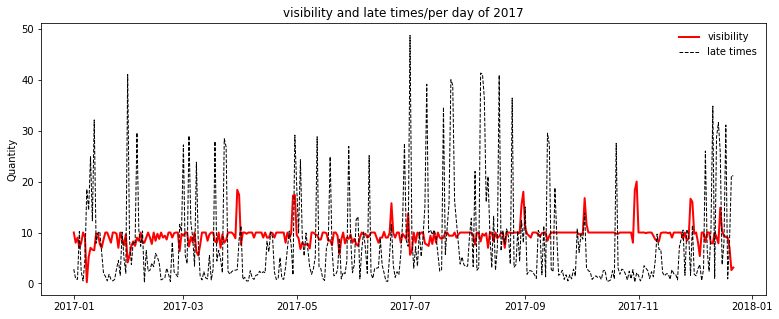

In [30]:
fig, ax = plt.subplots(figsize=(13,5))
#ax.plot(agg['DATE'], agg['precipitation'], linestyle='solid', c='red', lw=2,
#        alpha=0.8, label='precipitation')
ax.plot(agg['DATE'], agg['visibility'], linestyle='solid', c='red', lw=2,
        label='visibility')
ax.plot(agg['DATE'], agg['retard_times']/10, linestyle='dashed', c='black', lw=1, 
        label='late times')
ax.legend(loc='best', frameon=False)
ax.set_title('visibility and late times/per day of 2017')
ax.set_ylabel('Quantity')
plt.show()

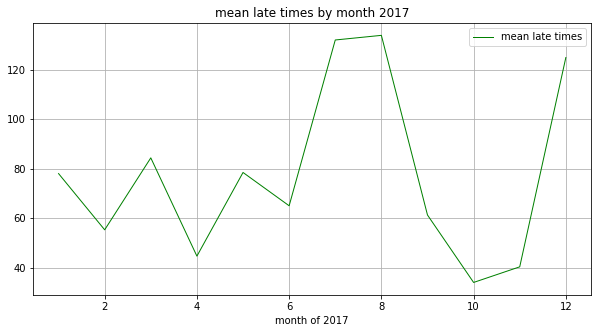

In [26]:
agg['month']=pd.to_datetime(agg['DATE'], format = '%Y-%m-%d').dt.month

plt.figure(figsize=(10,5))
plt.plot(agg['month'].unique(), agg.groupby('month')['retard_times'].mean(), linestyle='solid',c='green', lw=1, label='mean late times')
plt.title('mean late times by month 2017')
plt.xlabel("month of 2017")
plt.legend()
plt.grid()
plt.show()

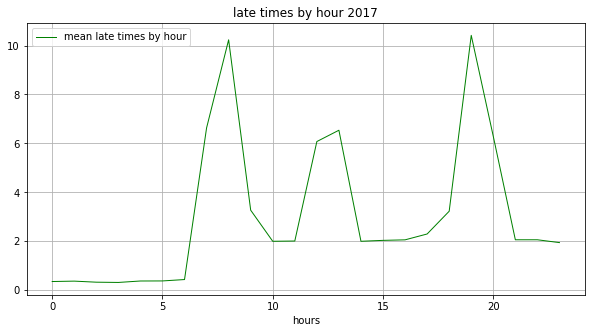

In [47]:
agghour = retard.groupby(['hour']).size().to_frame(name='late_times')
agghour['late_times'] = agghour['late_times']/12/31
plt.figure(figsize=(10,5))
plt.plot(agghour.index, agghour['late_times'], linestyle='solid',c='green', lw=1, label='mean late times by hour')
plt.title('late times by hour 2017')
plt.xlabel("hours")
plt.legend()
plt.grid()
plt.show()

In [77]:
# Linear regression to predict the late model
import statsmodels.api as sm

X = agg[['precipitation', 'visibility']]
y = agg['retard_times']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# With linear regression, R-squared is just 61.6%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           retard_times   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     284.3
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.31e-74
Time:                        00:53:38   Log-Likelihood:                -2040.3
No. Observations:                 356   AIC:                             4085.
Df Residuals:                     354   BIC:                             4092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
precipitation    11.8638      0.755     15.705      0.000      10.378      13.349
visibility        4.5321      0.449     10.105      0.000       3.650       5.414
==============================================================================
Omnibus:                       95.270   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.264
Skew:                           0.946   Prob(JB):                    3.70e-132
Kurtosis:                       9.101   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

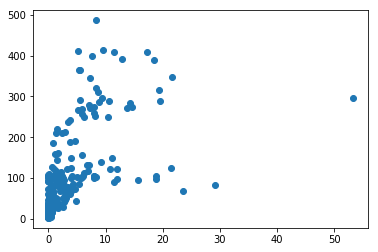

In [72]:
# Try to classification
plt.scatter(agg['precipitation'], agg['retard_times'])

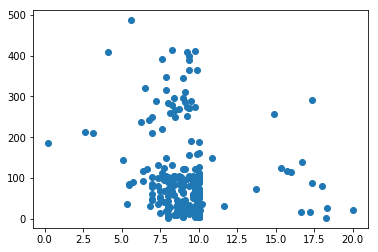

In [73]:
plt.scatter(agg['visibility'], agg['retard_times'])

Text(0.5,1,'prediction by GNB of precipitation dim')

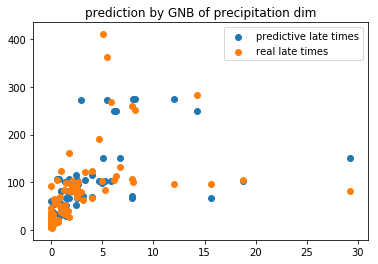

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test = train_test_split(agg, test_size=0.3)
gnb = GaussianNB()
gnb.fit(X_train[['precipitation', 'visibility', 'month']], X_train['retard_times'])
y = gnb.predict(X_test[['precipitation', 'visibility','month']])

plt.scatter(X_test['precipitation'], y, label='predictive late times')
plt.scatter(X_test['precipitation'], X_test['retard_times'], label='real late times')
plt.legend()
plt.title('prediction by GNB of precipitation dim')

Text(0.5,1,'prediction by GNB of visibility dim')

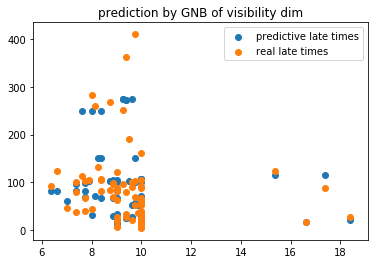

In [97]:
plt.scatter(X_test['visibility'], y, label='predictive late times')
plt.scatter(X_test['visibility'], X_test['retard_times'], label='real late times')
plt.legend()
plt.title('prediction by GNB of visibility dim')

Text(0.5,1,'prediction by GNB of month dim')

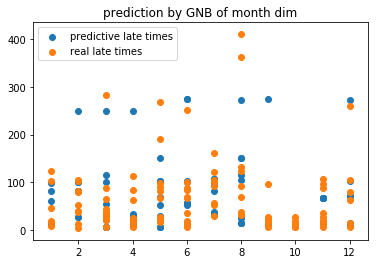

In [98]:
plt.scatter(X_test['month'], y, label='predictive late times')
plt.scatter(X_test['month'], X_test['retard_times'], label='real late times')
plt.legend()
plt.title('prediction by GNB of month dim')

In [104]:
import numpy as np
real_y = X_test['retard_times'].tolist()
bias = 0
for index,i in enumerate(real_y):
    bias += np.abs(i - y[index])
# Mean bias of daily late time 
print(bias/len(real_y))

30.1775700935
